Results of trained ResidualDetectron model (Detectron on residual images) to detect undetcted galaxies.
The training was performed on 61,584 images(15,396 x 4) of residuals of scarlet models of two galaxy blends where only one galaxy was detected by DM stack. 

In [1]:
import os
import sys
import numpy as np
import random
from astropy.table import Table
import h5py
import matplotlib#; matplotlib.use('Agg')
matplotlib.rcParams['figure.subplot.wspace'] = 0.05
matplotlib.rcParams['figure.subplot.hspace'] = 0.05
%matplotlib inline
import matplotlib.pyplot as plt

import matplotlib.patches as patches
import matplotlib.colors as mcolors
import matplotlib.lines as lines
from matplotlib.patches import Polygon
import dill
import pandas as pd

import scarlet
import scarlet.display

DATA_PATH = '/scratch/users/sowmyak/resid/'
CODE_PATH = '/home/users/sowmyak/ResidualDetectron/scripts'
sys.path.append(CODE_PATH)

import plot_utils

/home/users/sowmyak/.local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:

filename = os.path.join(DATA_PATH, "data",  "resid_val_blend_full.h5")
with h5py.File(filename, 'r') as hf:
    full_blend = hf['blend_images'][:]
    

filename = os.path.join(DATA_PATH, "data", "resid_val.h5")
with h5py.File(filename, 'r') as hf:
    X = hf['resid_images'][:]
assert not np.any(np.isnan(X))
filename = os.path.join(DATA_PATH, "data", "resid_val.csv")
Y = pd.read_csv(filename)


full_cat = Table.read(DATA_PATH + '/data/resid_val_full.fits', format='fits')

name = os.path.join(DATA_PATH, "results", 'resid1_val_results.dill')
with open(name, 'rb') as handle:
    results = dill.load(handle)

Training set and validation set loss at the end of each epoch of training. 

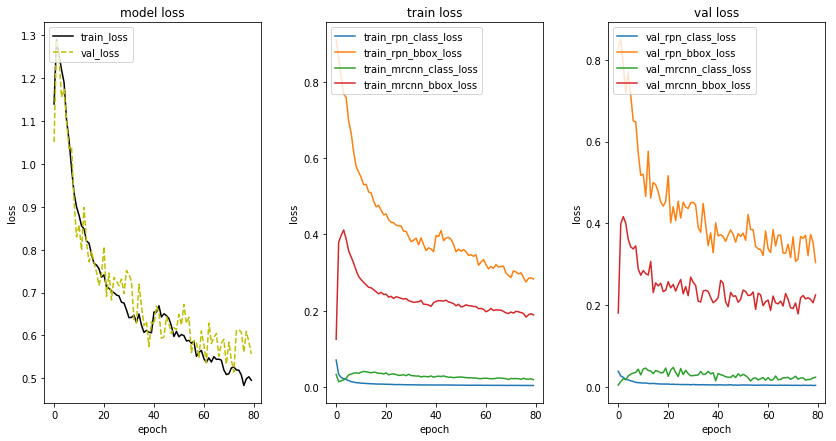

In [16]:
name1 = '/scratch/users/sowmyak/resid/results/resid1_run1_loss.dill'
with open(name1, 'rb') as handle:
    history1 = dill.load(handle)
name2 = '/scratch/users/sowmyak/resid/results/resid1_run2_loss.dill'
with open(name2, 'rb') as handle:
    history2 = dill.load(handle)
name3 = '/scratch/users/sowmyak/resid/results/resid2_run1_loss.dill'
with open(name3, 'rb') as handle:
    history3 = dill.load(handle)
name4 = '/scratch/users/sowmyak/resid/results/resid2_run2_loss.dill'
with open(name4, 'rb') as handle:
    history4 = dill.load(handle)
loss_names = ['rpn_class_loss', 'rpn_bbox_loss', 'mrcnn_class_loss',
                  'mrcnn_bbox_loss']
fig, ax = plt.subplots(1, 3, figsize=(14, 7))
plt.subplots_adjust(hspace=0.3, wspace=0.3)
ax[0].plot(history1['loss'] + history2['loss']+ history3['loss']+ history4['loss'], 'k-',label='train_loss')
ax[0].plot(history1['val_loss']+ history2['val_loss']+ history3['val_loss']+ history4['val_loss'],'y--', label='val_loss')
ax[0].set_title('model loss')
ax[0].set_ylabel('loss')
ax[0].set_xlabel('epoch')
ax[0].legend(loc='upper left')
for name in loss_names:
    ax[1].plot(history1[name] + history2[name]+ history3[name]+ history4[name], label='train_' + name)
ax[1].set_title('train loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(loc='upper left')
for name in loss_names:
    ax[2].plot(history1['val_' + name] + history2['val_' + name] + history3['val_' + name]+ history4['val_' + name], label='val_' + name)
ax[2].set_title('val loss')
ax[2].set_ylabel('loss')
ax[2].set_xlabel('epoch')
ax[2].legend(loc='upper left')

Network seems to be overfitting beyond epoch 60. We load network weights at epoch 60 and examine the results of the validation set.


Only regions predicted with score>0.9 are included in results

In [4]:
count = 0
for name in results.keys():
    print(name, len(np.unique(results[name]['id'])))
    count += len(np.unique(results[name]['id']))
print('total: ', count)

unrecog_blnd 3
iter_recog 2779
check 0
iter_spurious2 27
iter_shred 883
total:  3692


### Iteratively recognized blends

One object per image predicted by network



The bounding box corresponding to the undetected galaxy is shown in yellow. Network predicted box is shown in black along with the network predicted score. The network was trained on 6 band residual image + scarlet model corresponding to one detected source. Green dot is the center of the scarlet model. Blue and red Xs are the dimmer and brighter galaxies respectively. The blened image of the gal pair is shown only for reference and was not input to the neural network.

To measure perfomance of the network we print the Intersection over Union (IoU) of the bounding box of the undetected galaxy and the network prediction (black and yellow boxes). 

score: 0.9967272 IoU: 0.9
predicted bbox center to true center (pixels): 0.5
predicted bbox center to true center/ distance between gal pairs: 0.08815693992741766


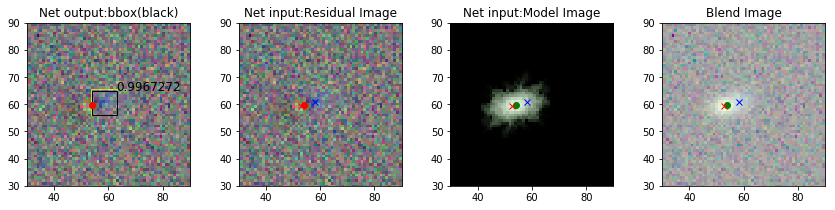

score: 0.9976349 IoU: 0.5625
predicted bbox center to true center (pixels): 1.0
predicted bbox center to true center/ distance between gal pairs: 0.280976563955594


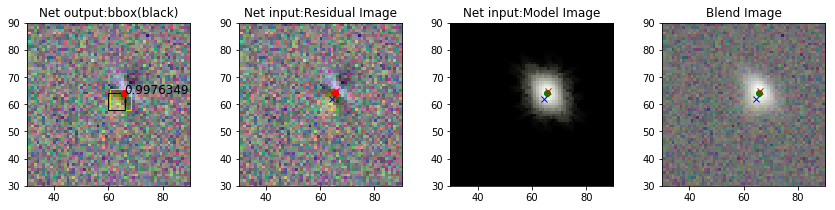

score: 0.997255 IoU: 0.35398230088495575
predicted bbox center to true center (pixels): 4.031128874149275
predicted bbox center to true center/ distance between gal pairs: 0.76416693619147


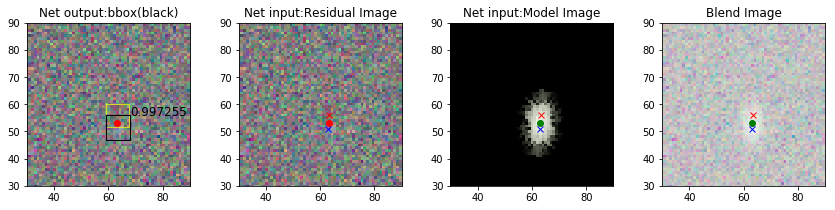

score: 0.9989011 IoU: 0.8461538461538461
predicted bbox center to true center (pixels): 1.0
predicted bbox center to true center/ distance between gal pairs: 0.13339347371867546


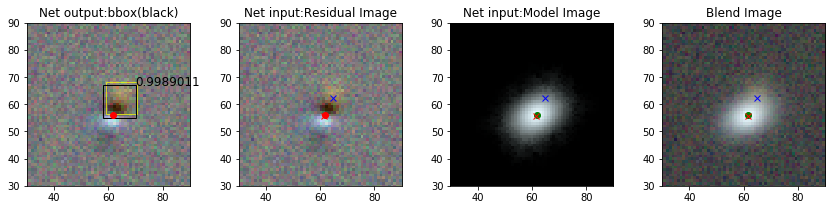

score: 0.9963529 IoU: 0.8333333333333334
predicted bbox center to true center (pixels): 0.5
predicted bbox center to true center/ distance between gal pairs: 0.060823905513706505


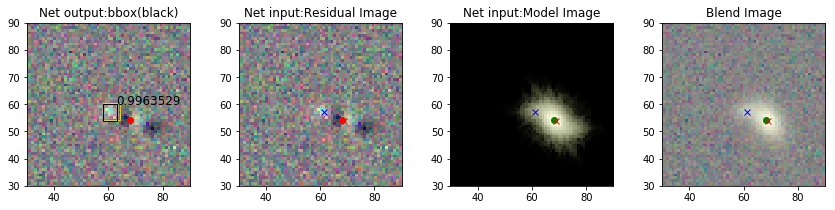

score: 0.99871254 IoU: 0.7346938775510204
predicted bbox center to true center (pixels): 0.7071067811865476
predicted bbox center to true center/ distance between gal pairs: 0.09151323313966166


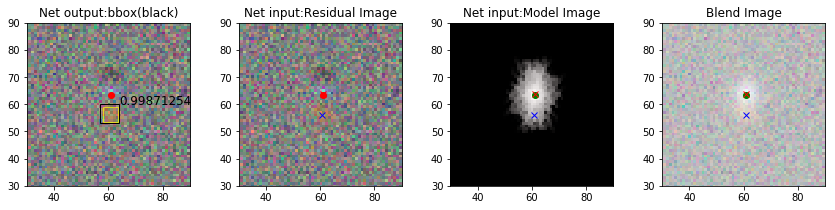

score: 0.9985733 IoU: 0.5555555555555556
predicted bbox center to true center (pixels): 2.0
predicted bbox center to true center/ distance between gal pairs: 0.4989413506112265


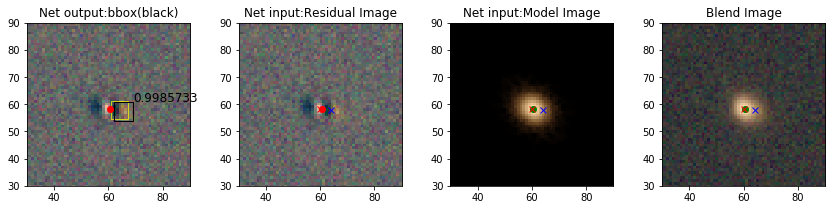

score: 0.99930906 IoU: 0.765625
predicted bbox center to true center (pixels): 0.7071067811865476
predicted bbox center to true center/ distance between gal pairs: 0.098611461108266


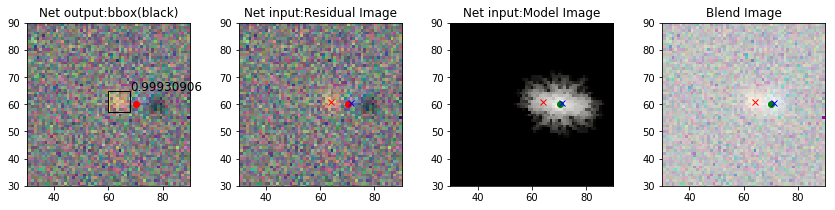

score: 0.9987564 IoU: 0.6407766990291263
predicted bbox center to true center (pixels): 2.1213203435596424
predicted bbox center to true center/ distance between gal pairs: 0.29466076908602473


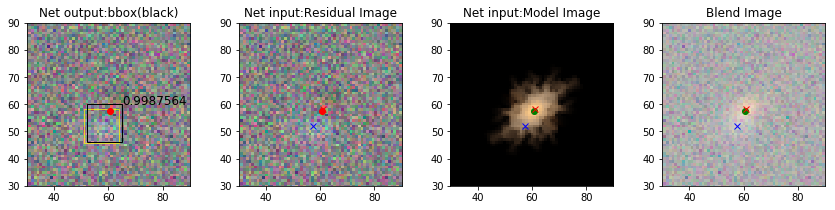

score: 0.9995383 IoU: 0.7191011235955056
predicted bbox center to true center (pixels): 1.118033988749895
predicted bbox center to true center/ distance between gal pairs: 0.11806057078948283


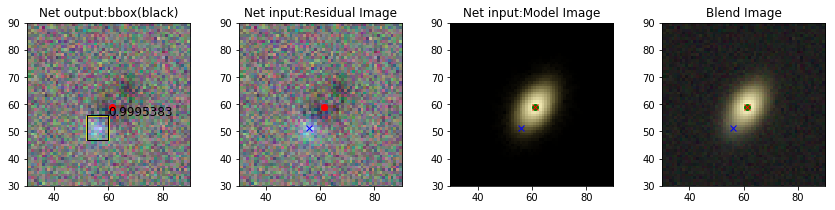

In [5]:
name = 'iter_recog'
image_ids = np.random.choice(results[name]['id'], 10,replace=False)
for image_id in image_ids:
    q, = np.where(results[name]['id'] == image_id)
    print('score:',  results[name]['score'][q[0]],
          'IoU:', results[name]['iou'][q[0]])
    print('predicted bbox center to true center (pixels):', np.hypot(results[name]['dx'][q[0]], results[name]['dy'][q[0]] ))
    print('predicted bbox center to true center/ distance between gal pairs:', results[name]['ds'][q[0]] )
    plot_utils.plot_results_images(results[name], full_blend, X, Y, image_id)

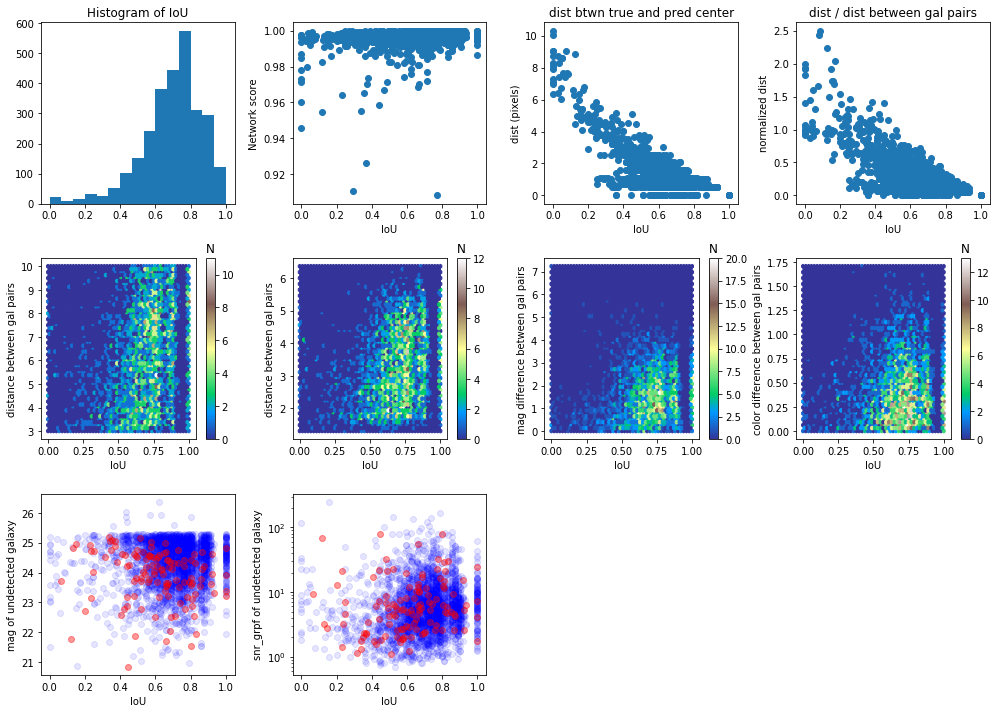

In [6]:
plt.figure(figsize=(17,12))
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.subplot(3,4,1)
plt.hist(results[name]['iou'], 15)
plt.title("Histogram of IoU")

plt.subplot(3,4,2)
plt.plot(results[name]['iou'], results[name]['score'], 'o')
plt.xlabel('IoU')
plt.ylabel('Network score')

plt.subplot(3,4,3)
dist = np.hypot(results[name]['dx'], results[name]['dy'])
plt.plot(results[name]['iou'], dist , 'o')
plt.xlabel('IoU')
plt.ylabel('dist (pixels)')
plt.title('dist btwn true and pred center')

plt.subplot(3,4,4)
plt.plot(results[name]['iou'], results[name]['ds'], 'o')
plt.xlabel('IoU')
plt.ylabel('normalized dist')
plt.title('dist / dist between gal pairs')

distance = np.hypot(full_cat['dx_1']-full_cat['dx_2'], full_cat['dy_1']-full_cat['dy_2'])/0.2
plt.subplot(3,4,5)
plt.hexbin(results[name]['iou'], distance[results[name]['id']],gridsize=50,
           cmap='terrain')
clb = plt.colorbar()
clb.ax.set_title('N')
plt.xlabel('IoU')
plt.ylabel('distance between gal pairs')

unit_distance = distance / (np.hypot(0.67, full_cat['sigma_m_1'] ) + np.hypot(0.67,full_cat['sigma_m_2'] ))
plt.subplot(3,4,6)
plt.hexbin(results[name]['iou'], unit_distance[results[name]['id']],gridsize=50,
           cmap='terrain')
clb = plt.colorbar()
clb.ax.set_title('N')
plt.xlabel('IoU')
plt.ylabel('distance between gal pairs')

mag = np.abs(full_cat['ab_mag_1']-full_cat['ab_mag_2'])
plt.subplot(3,4,7)
plt.hexbin(results[name]['iou'], mag[results[name]['id']],gridsize=50,
           cmap='terrain')
clb = plt.colorbar()
clb.ax.set_title('N')
plt.xlabel('IoU')
plt.ylabel('mag difference between gal pairs')

col = np.abs(full_cat['ri_color_1']-full_cat['ri_color_2'])
plt.subplot(3,4,8)
plt.hexbin(results[name]['iou'], col[results[name]['id']],gridsize=50,
           cmap='terrain')
clb = plt.colorbar()
clb.ax.set_title('N')
plt.xlabel('IoU')
plt.ylabel('color difference between gal pairs')



q1, = np.where(Y['input_indxs'][results[name]['id']] == 0)
un_mag1 = full_cat['ab_mag_2'][np.array(results[name]['id'])[q1]]
q2, = np.where(Y['input_indxs'][results[name]['id']] == 1)
un_mag2 = full_cat['ab_mag_1'][np.array(results[name]['id'])[q2]]
plt.subplot(3,4,9)
plt.plot(np.array(results[name]['iou'])[q1], un_mag1, 'bo', alpha=0.1)
plt.plot(np.array(results[name]['iou'])[q2], un_mag2, 'ro', alpha=0.4)
plt.xlabel('IoU')
plt.ylabel('mag of undetected galaxy')


plt.subplot(3,4,10)
plt.semilogy(np.array(results[name]['iou'])[q1], full_cat['snr_grpf_2'][np.array(results[name]['id'])[q1]], 'bo', alpha=0.1)
plt.semilogy(np.array(results[name]['iou'])[q2], full_cat['snr_grpf_1'][np.array(results[name]['id'])[q2]], 'ro', alpha=0.4)
plt.xlabel('IoU')
plt.ylabel('snr_grpf of undetected galaxy')

plt.show()

Example galaxies with undetected galaxy snr < 1 and detection IoU>0.3

score: 0.9980545 IoU: 0.6694214876033058
predicted bbox center to true center (pixels): 0.0
predicted bbox center to true center/ distance between gal pairs: 0.0


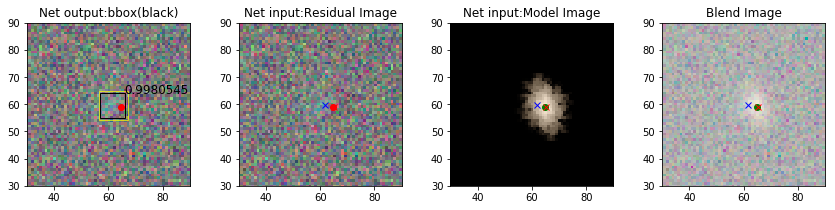

score: 0.99552995 IoU: 0.7346938775510204
predicted bbox center to true center (pixels): 0.7071067811865476
predicted bbox center to true center/ distance between gal pairs: 0.19023976410113091


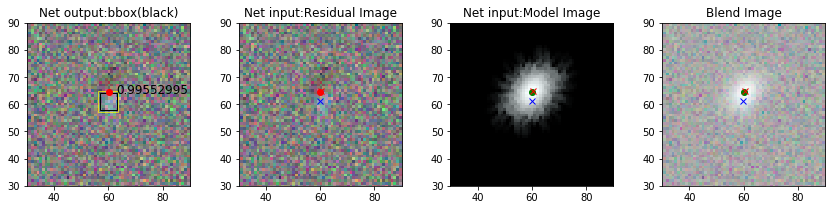

score: 0.99890745 IoU: 0.41379310344827586
predicted bbox center to true center (pixels): 3.1622776601683795
predicted bbox center to true center/ distance between gal pairs: 0.9744223949219363


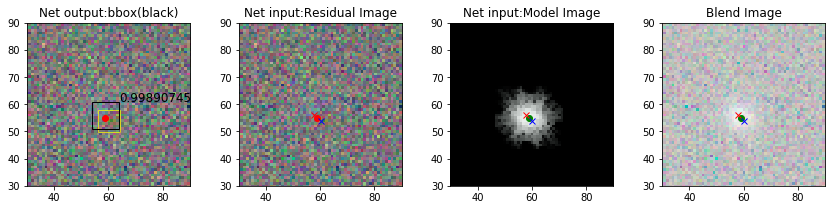

score: 0.9909978 IoU: 0.3614457831325301
predicted bbox center to true center (pixels): 2.9154759474226504
predicted bbox center to true center/ distance between gal pairs: 0.8790166175697666


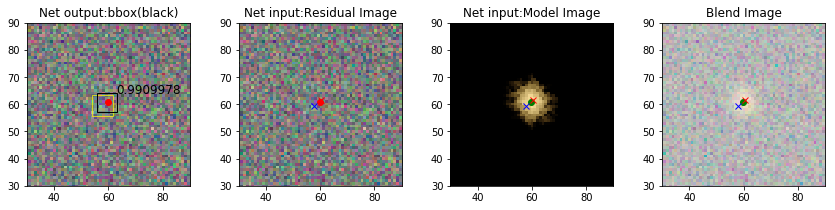

score: 0.99410903 IoU: 0.7
predicted bbox center to true center (pixels): 1.118033988749895
predicted bbox center to true center/ distance between gal pairs: 0.3460976203831929


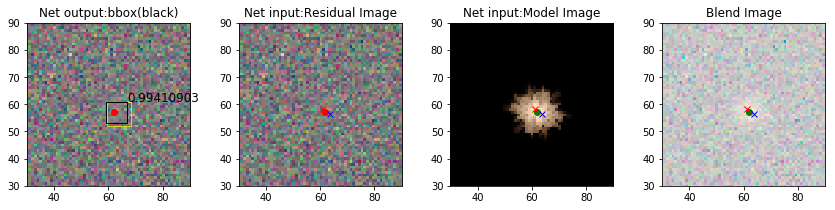

score: 0.99502146 IoU: 0.45454545454545453
predicted bbox center to true center (pixels): 2.5495097567963922
predicted bbox center to true center/ distance between gal pairs: 0.8432597435520036


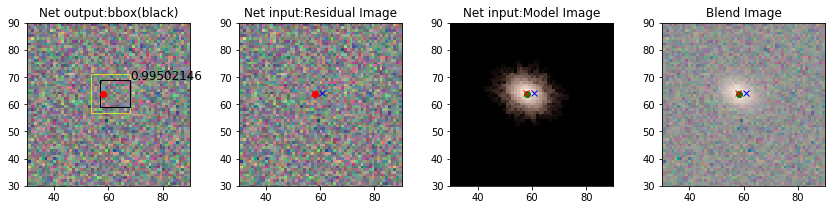

score: 0.9998319 IoU: 0.5289256198347108
predicted bbox center to true center (pixels): 1.5811388300841898
predicted bbox center to true center/ distance between gal pairs: 0.5263119737087086


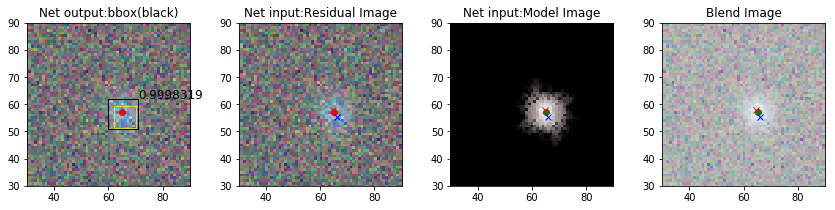

score: 0.99360764 IoU: 0.8
predicted bbox center to true center (pixels): 1.0
predicted bbox center to true center/ distance between gal pairs: 0.33291281068791734


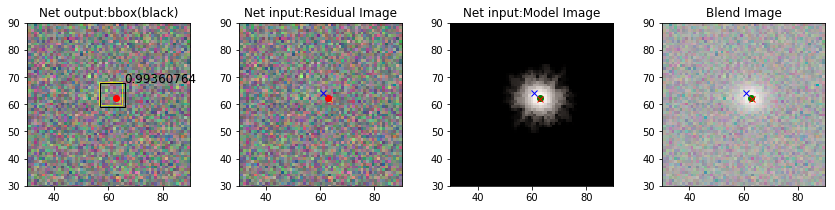

score: 0.99458545 IoU: 0.44871794871794873
predicted bbox center to true center (pixels): 2.5495097567963922
predicted bbox center to true center/ distance between gal pairs: 0.8354067142389067


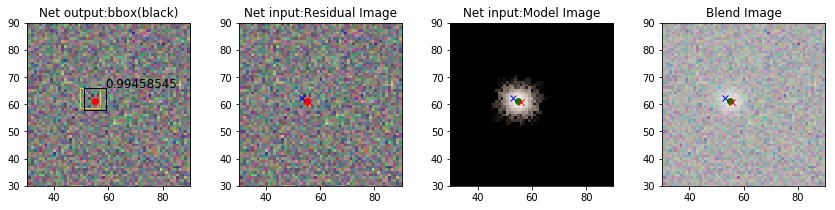

score: 0.99752516 IoU: 0.6428571428571429
predicted bbox center to true center (pixels): 2.5
predicted bbox center to true center/ distance between gal pairs: 0.5936519652680742


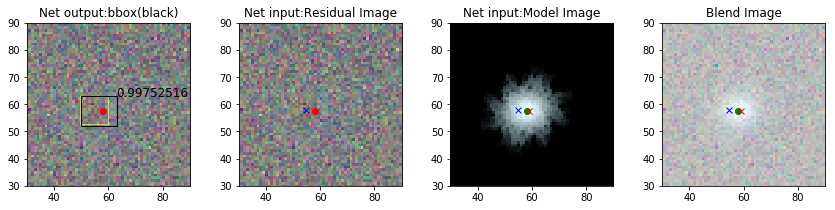

In [7]:
indxs1 = np.array(results[name]['id'])[q1]
q, = np.where((full_cat['snr_grpf_2'][indxs1] < 1) & (np.array(results[name]['iou'])[q1] > 0.3))
image_ids = np.random.choice(np.array(results[name]['id'])[q1[q]], 10,replace=False)
for image_id in image_ids:
    q, = np.where(results[name]['id'] == image_id)
    print('score:',  results[name]['score'][q[0]],
          'IoU:', results[name]['iou'][q[0]])
    print('predicted bbox center to true center (pixels):', np.hypot(results[name]['dx'][q[0]], results[name]['dy'][q[0]] ))
    print('predicted bbox center to true center/ distance between gal pairs:', results[name]['ds'][q[0]] )
    plot_utils.plot_results_images(results[name], full_blend, X, Y, image_id)

Example of detecting other galaxy in pair

13  detected other galaxy in pair 
score: 0.97145736 IoU: 0.0
predicted bbox center to true center (pixels): 7.280109889280518
predicted bbox center to true center/ distance between gal pairs: 0.9166720349319761


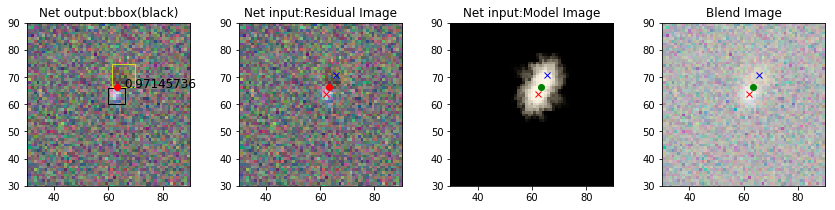

score: 0.9797177 IoU: 0.03289473684210526
predicted bbox center to true center (pixels): 8.276472678623424
predicted bbox center to true center/ distance between gal pairs: 0.9986639990351384


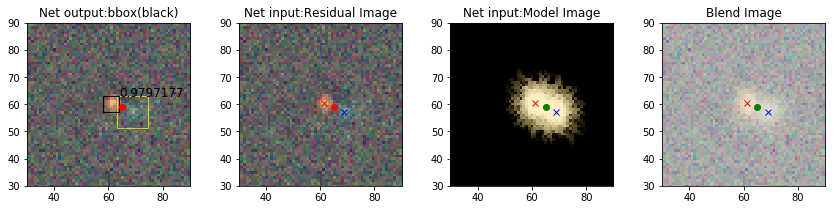

score: 0.99180895 IoU: 0.04819277108433735
predicted bbox center to true center (pixels): 8.631338250816034
predicted bbox center to true center/ distance between gal pairs: 0.9040220144576449


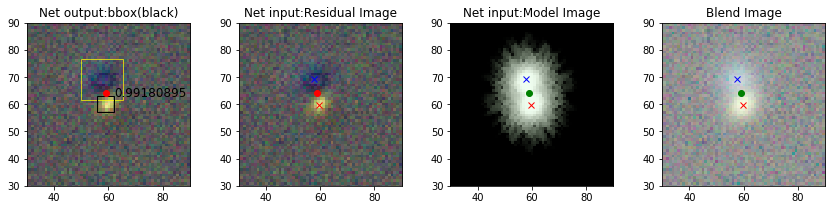

score: 0.9968731 IoU: 0.043010752688172046
predicted bbox center to true center (pixels): 6.726812023536855
predicted bbox center to true center/ distance between gal pairs: 1.0601287075986048


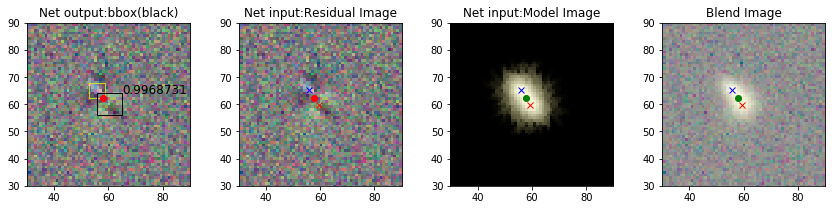

score: 0.994044 IoU: 0.027777777777777776
predicted bbox center to true center (pixels): 6.4031242374328485
predicted bbox center to true center/ distance between gal pairs: 0.8677779585032307


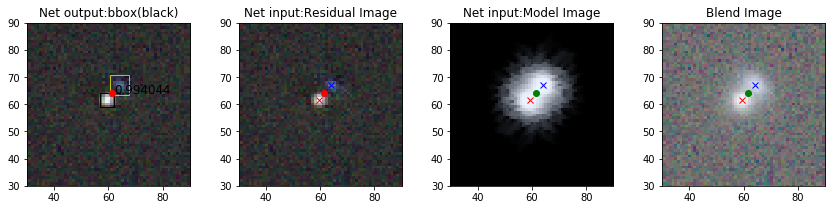

score: 0.9949115 IoU: 0.06569343065693431
predicted bbox center to true center (pixels): 7.433034373659253
predicted bbox center to true center/ distance between gal pairs: 0.9843386952954442


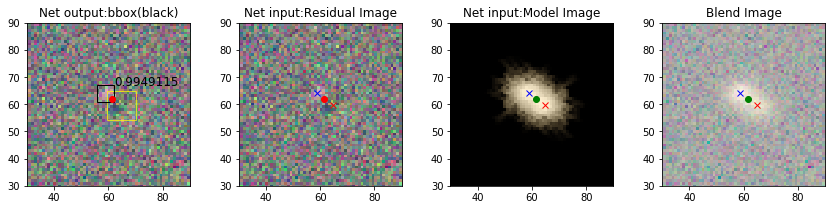

score: 0.9985316 IoU: 0.035398230088495575
predicted bbox center to true center (pixels): 7.3824115301167
predicted bbox center to true center/ distance between gal pairs: 1.008511310764663


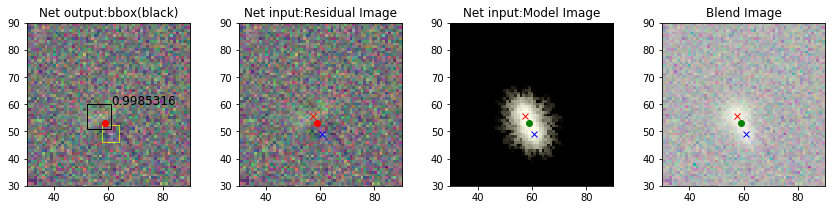

score: 0.94598424 IoU: 0.0
predicted bbox center to true center (pixels): 9.013878188659973
predicted bbox center to true center/ distance between gal pairs: 1.0650676311235394


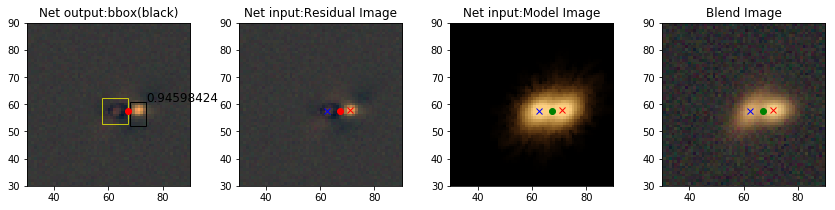

score: 0.97291595 IoU: 0.0
predicted bbox center to true center (pixels): 9.013878188659973
predicted bbox center to true center/ distance between gal pairs: 0.9858430481259035


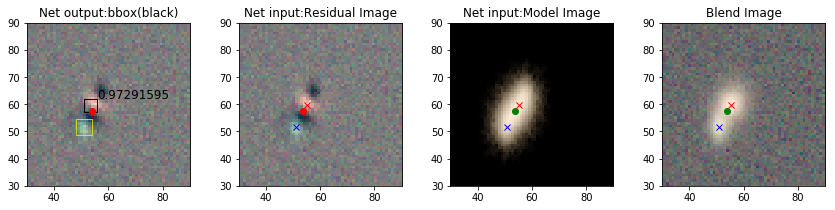

score: 0.99786276 IoU: 0.0
predicted bbox center to true center (pixels): 6.324555320336759
predicted bbox center to true center/ distance between gal pairs: 0.9981574660031532


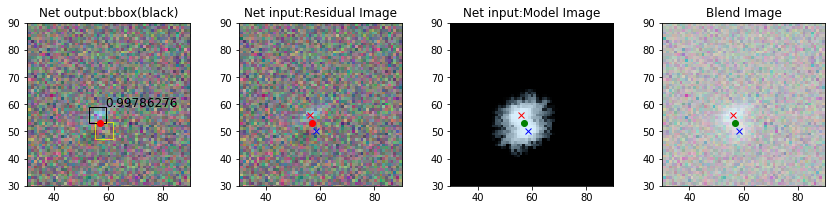

In [8]:

q, = np.where((np.array(results[name]['ds']) < 1.1) & (np.array(results[name]['iou']) < 0.1))
print(f"{len(q)}  detected other galaxy in pair ")
image_ids = np.random.choice(np.array(results[name]['id'])[q], 10,replace=False)
for image_id in image_ids:
    q, = np.where(results[name]['id'] == image_id)
    print('score:',  results[name]['score'][q[0]],
          'IoU:', results[name]['iou'][q[0]])
    print('predicted bbox center to true center (pixels):', np.hypot(results[name]['dx'][q[0]], results[name]['dy'][q[0]] ))
    print('predicted bbox center to true center/ distance between gal pairs:', results[name]['ds'][q[0]] )
    plot_utils.plot_results_images(results[name], full_blend, X, Y, image_id)

15 dist/distance bwn pairs > 1.5 
score: 0.9954436 IoU: 0.07468879668049792
predicted bbox center to true center (pixels): 9.013878188659973
predicted bbox center to true center/ distance between gal pairs: 1.664097780893517


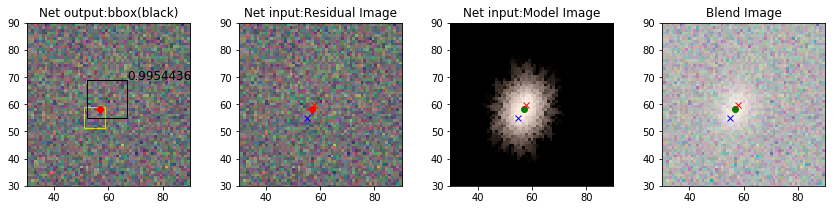

score: 0.99789643 IoU: 0.15873015873015872
predicted bbox center to true center (pixels): 5.315072906367325
predicted bbox center to true center/ distance between gal pairs: 1.730460999689941


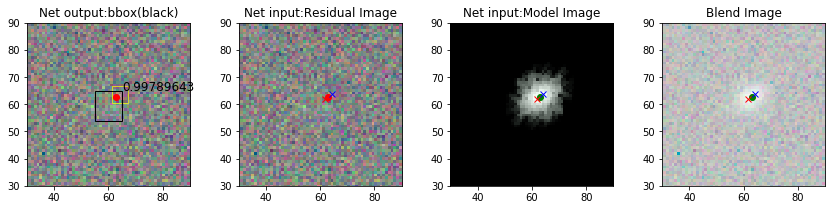

score: 0.99646974 IoU: 0.16393442622950818
predicted bbox center to true center (pixels): 5.408326913195984
predicted bbox center to true center/ distance between gal pairs: 1.697197049703518


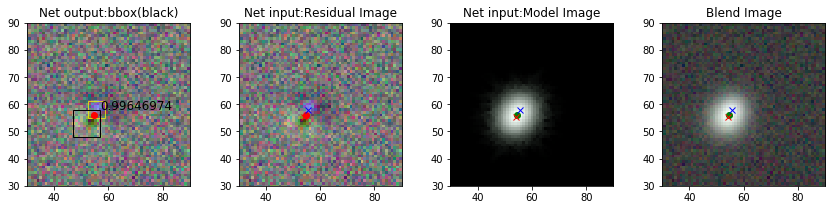

score: 0.99708635 IoU: 0.08411214953271028
predicted bbox center to true center (pixels): 7.615773105863909
predicted bbox center to true center/ distance between gal pairs: 2.4995687947005463


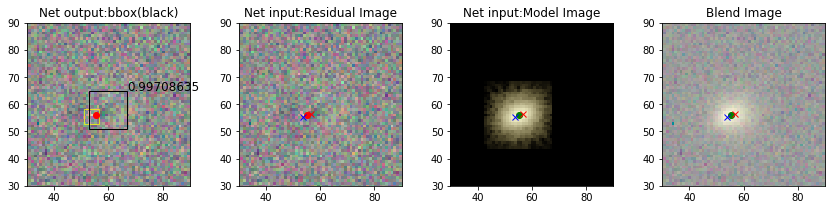

score: 0.99242145 IoU: 0.15254237288135594
predicted bbox center to true center (pixels): 5.385164807134504
predicted bbox center to true center/ distance between gal pairs: 1.7426456406388213


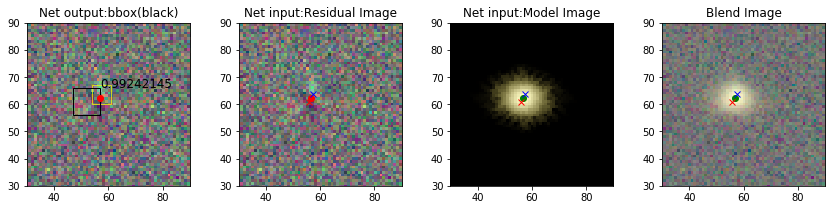

score: 0.9940696 IoU: 0.04938271604938271
predicted bbox center to true center (pixels): 8.602325267042627
predicted bbox center to true center/ distance between gal pairs: 1.5932556237452289


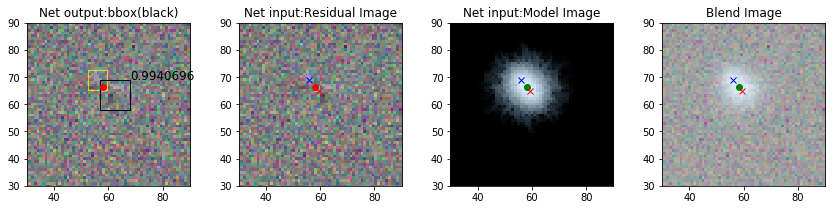

score: 0.9909704 IoU: 0.12631578947368421
predicted bbox center to true center (pixels): 8.845903006477066
predicted bbox center to true center/ distance between gal pairs: 2.243663184422597


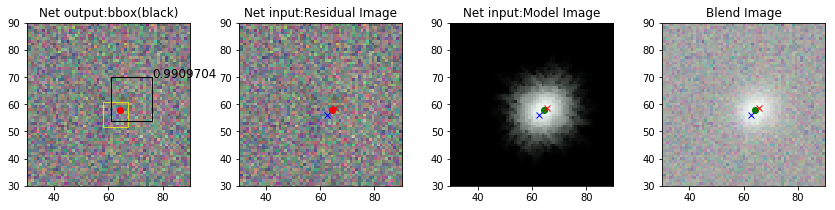

score: 0.9961307 IoU: 0.0782122905027933
predicted bbox center to true center (pixels): 7.648529270389178
predicted bbox center to true center/ distance between gal pairs: 2.4286560122030214


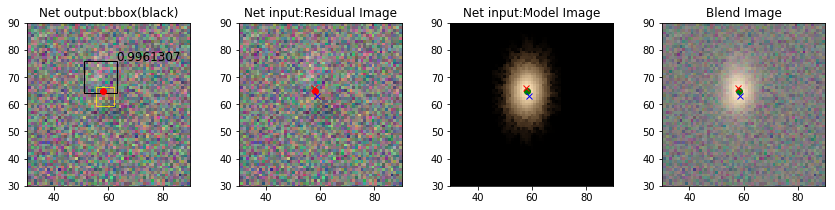

score: 0.9940591 IoU: 0.2
predicted bbox center to true center (pixels): 5.0
predicted bbox center to true center/ distance between gal pairs: 1.532890713069614


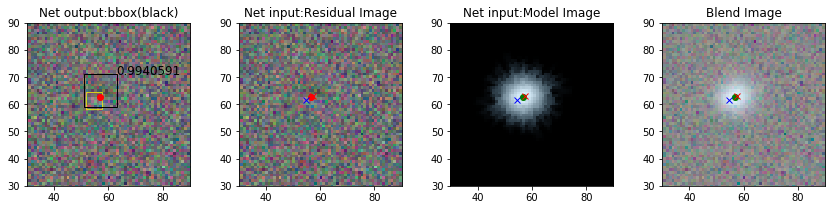

score: 0.9848119 IoU: 0.0
predicted bbox center to true center (pixels): 7.0710678118654755
predicted bbox center to true center/ distance between gal pairs: 1.9893408892326698


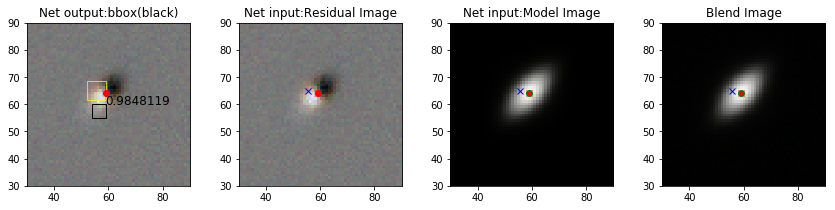

In [9]:
q, = np.where((np.array(results[name]['ds']) >1.5))
print(f"{len(q)} dist/distance bwn pairs > 1.5 ")
image_ids = np.random.choice(np.array(results[name]['id'])[q], 10,replace=False)
for image_id in image_ids:
    q, = np.where(results[name]['id'] == image_id)
    print('score:',  results[name]['score'][q[0]],
          'IoU:', results[name]['iou'][q[0]])
    print('predicted bbox center to true center (pixels):', np.hypot(results[name]['dx'][q[0]], results[name]['dy'][q[0]] ))
    print('predicted bbox center to true center/ distance between gal pairs:', results[name]['ds'][q[0]] )
    plot_utils.plot_results_images(results[name], full_blend, X, Y, image_id)

### Unrecognized Blends 

 NO network predicted region with score>0.9

scarlet number of iterations 9
mag of bright object 19.030325


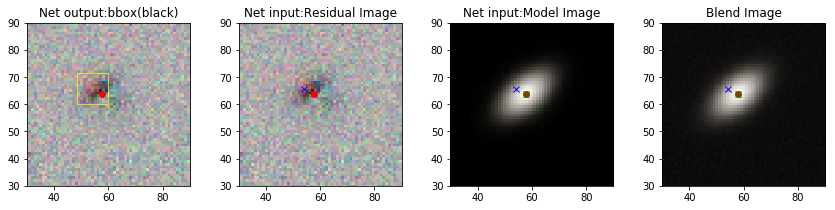

scarlet number of iterations 22
mag of bright object 17.004206


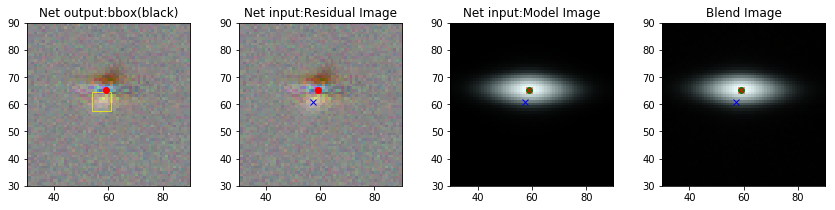

scarlet number of iterations 12
mag of bright object 20.024603


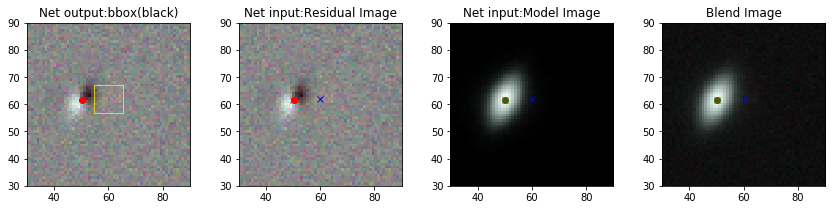

In [10]:
image_ids = results['unrecog_blnd']['id']
for image_id in image_ids:
    print("scarlet number of iterations", Y['niters'][image_id])
    print("mag of bright object", full_cat['ab_mag_1'][image_id])
    plot_utils.plot_results_images(results['unrecog_blnd'], full_blend, X, Y, image_id)

### Spurious detection

More than 1 predicted output atleast one of which has IoU=0

Number of predictions 4


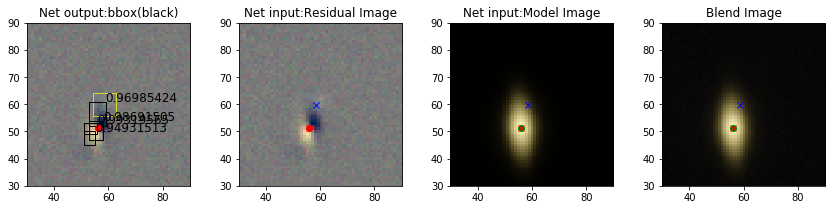

Number of predictions 2


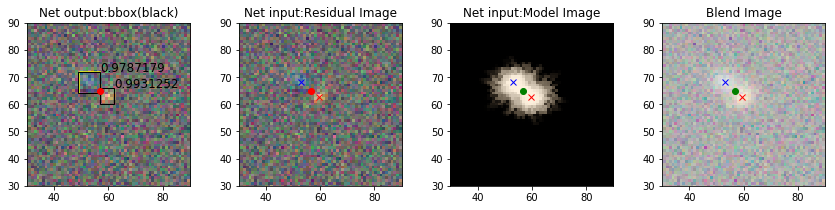

Number of predictions 2


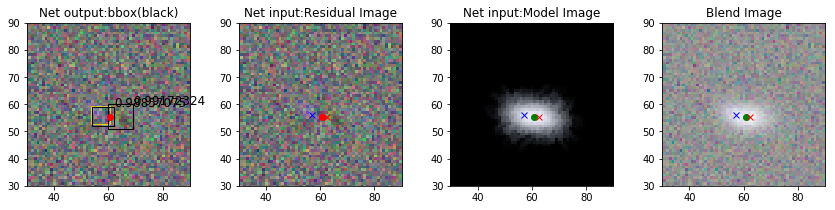

Number of predictions 3


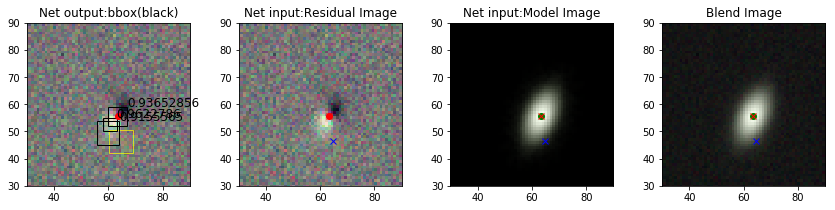

Number of predictions 2


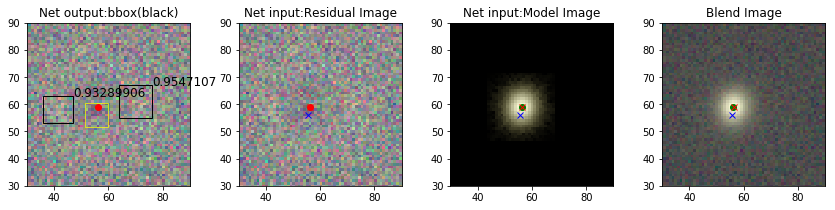

Number of predictions 3


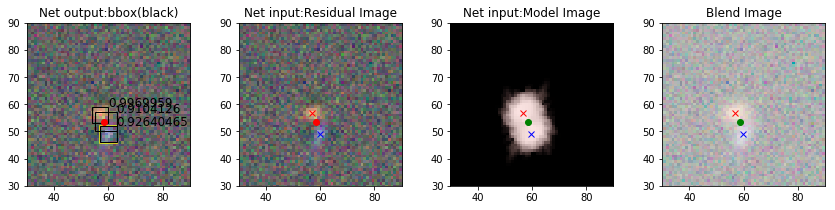

Number of predictions 2


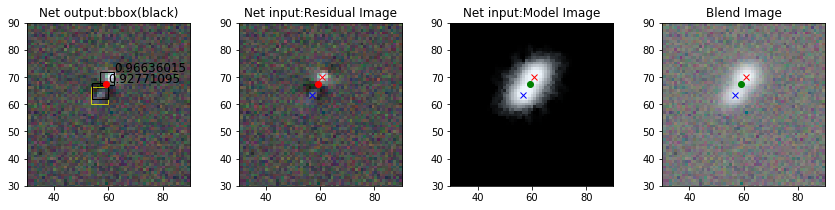

Number of predictions 3


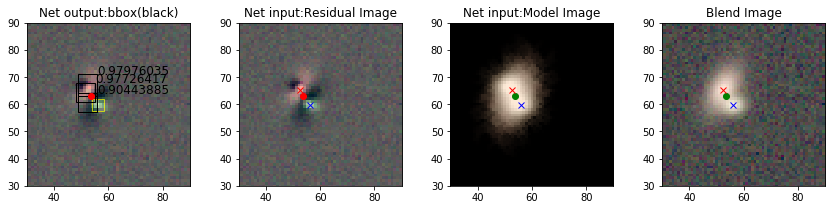

Number of predictions 2


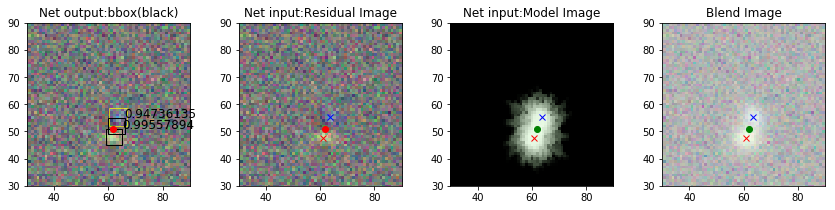

Number of predictions 3


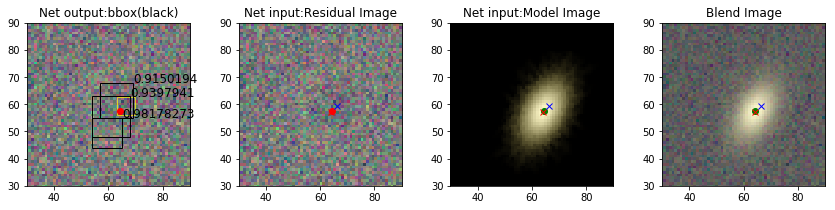

Number of predictions 3


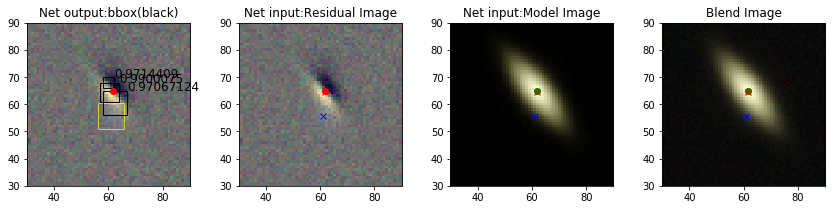

Number of predictions 3


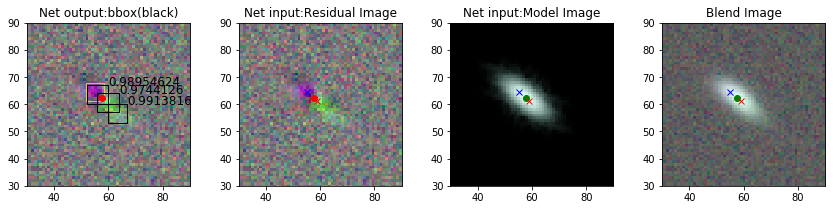

Number of predictions 2


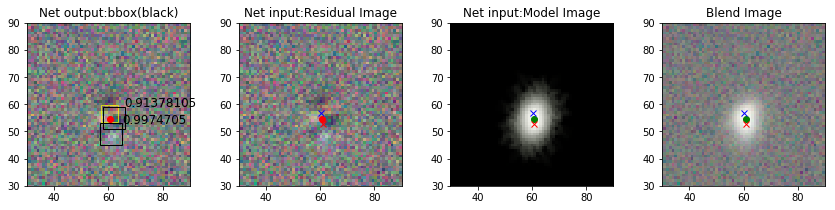

Number of predictions 3


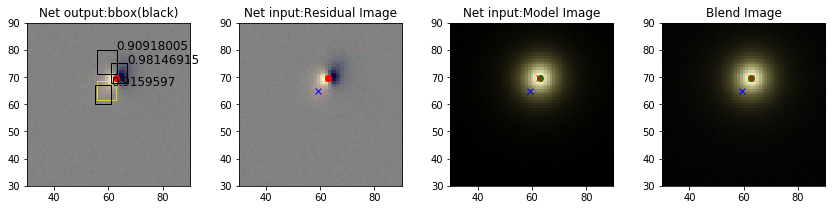

Number of predictions 2


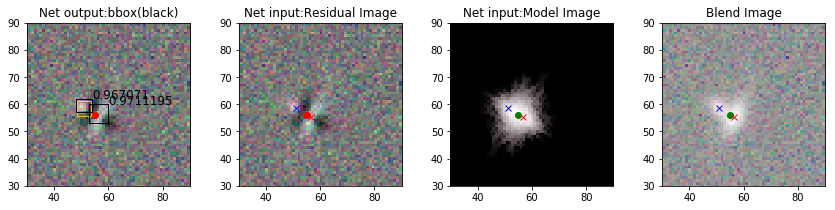

Number of predictions 2


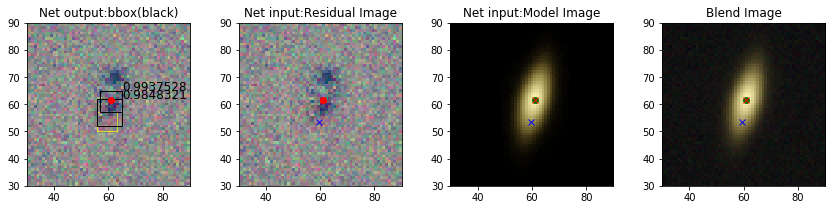

Number of predictions 3


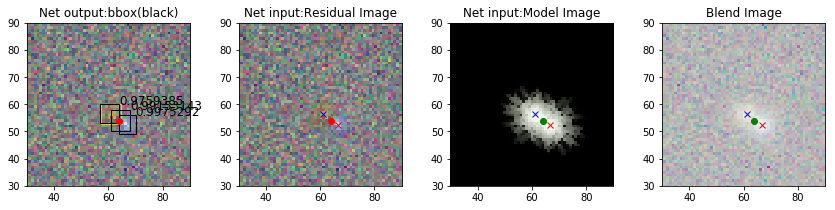

Number of predictions 3


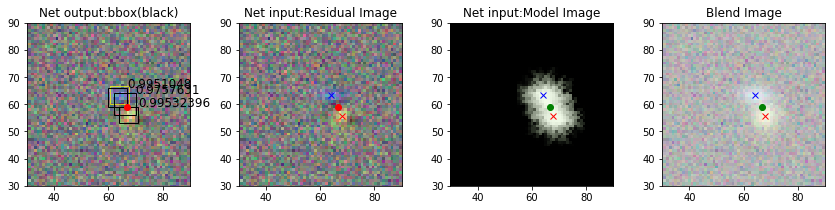

Number of predictions 2


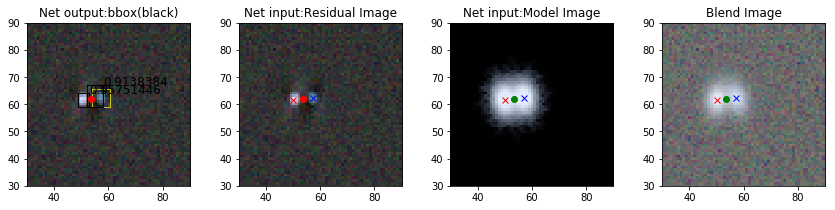

Number of predictions 3


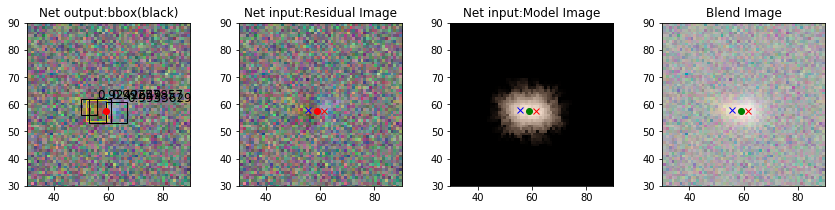

Number of predictions 3


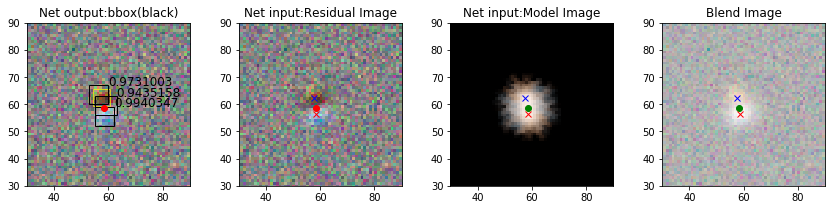

Number of predictions 2


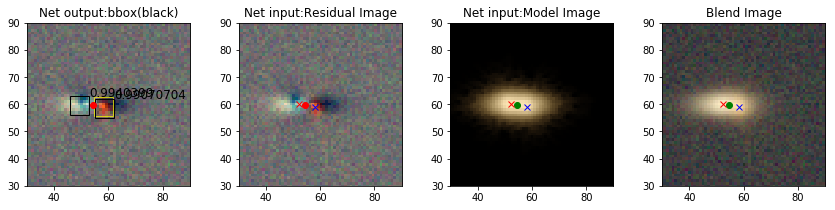

Number of predictions 5


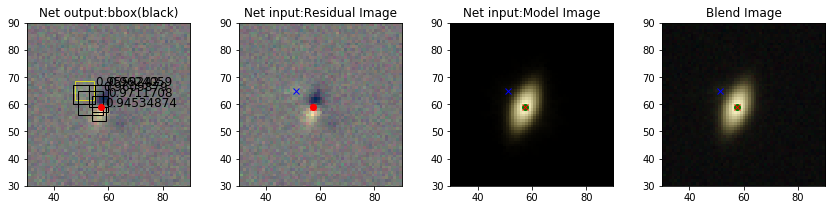

Number of predictions 2


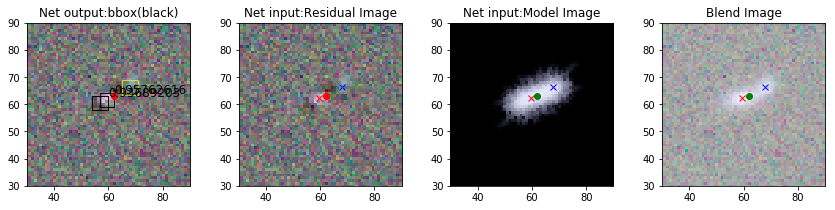

Number of predictions 3


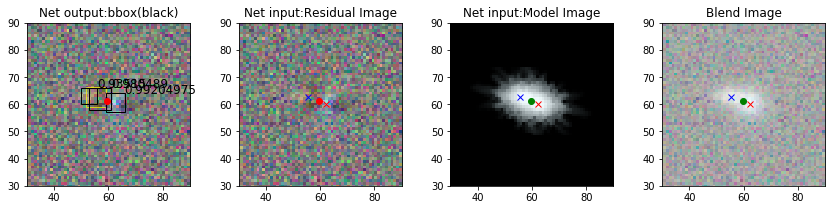

Number of predictions 2


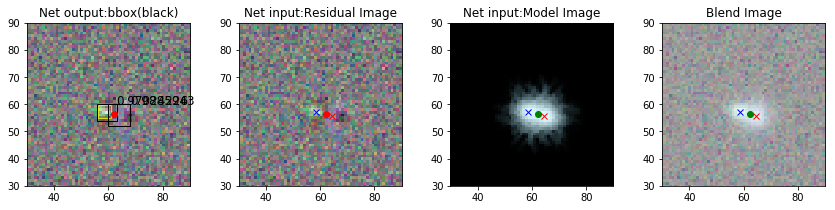

Number of predictions 3


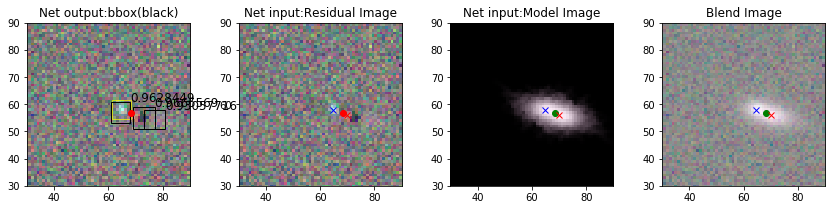

In [11]:
image_ids = np.unique(results['iter_spurious2']['id'])
for image_id in image_ids:
    q, = np.where(results['iter_spurious2']['id'] == image_id)
    print("Number of predictions", len(q))
    plot_utils.plot_results_images(results['iter_spurious2'], full_blend, X, Y, image_id)

## iter_sherd

### Shredded detections

More than 1 predicted output all with IoU=0

Number of predictions 2


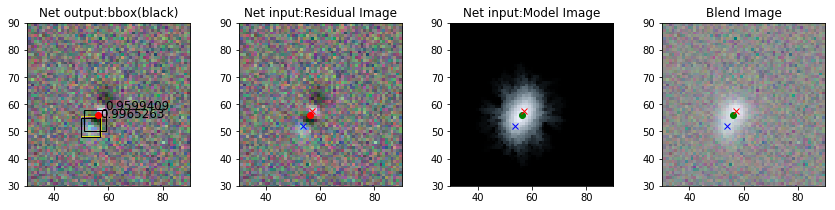

Number of predictions 3


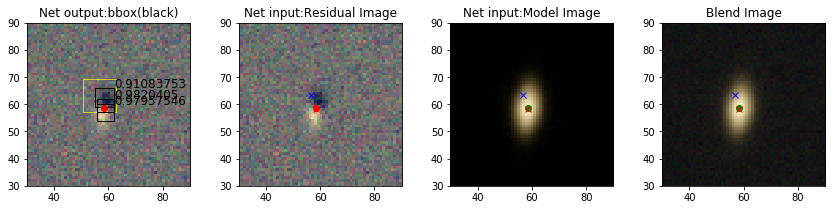

Number of predictions 2


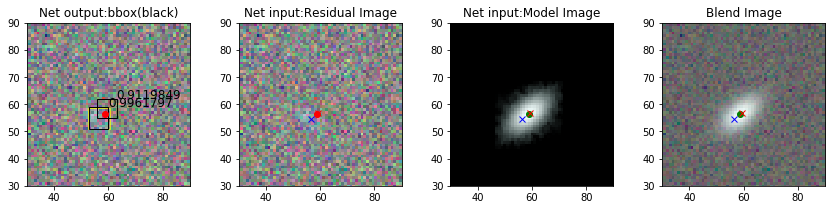

Number of predictions 3


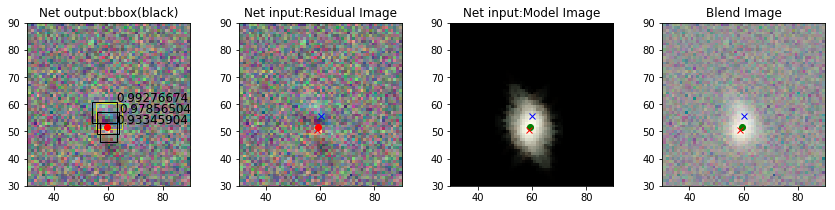

Number of predictions 2


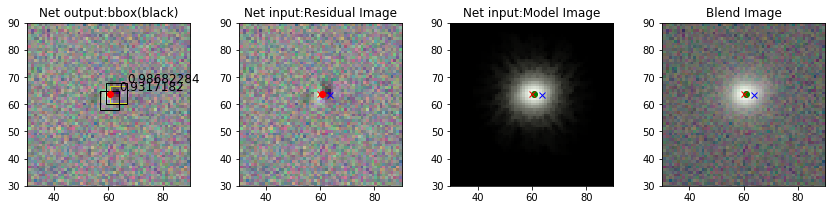

Number of predictions 2


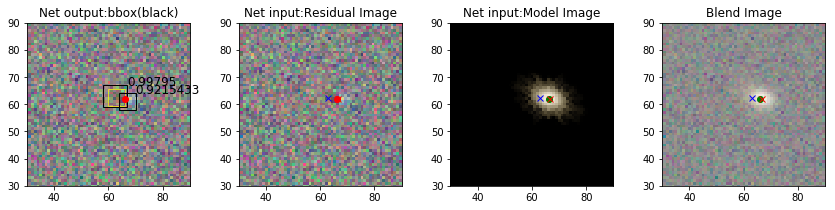

Number of predictions 5


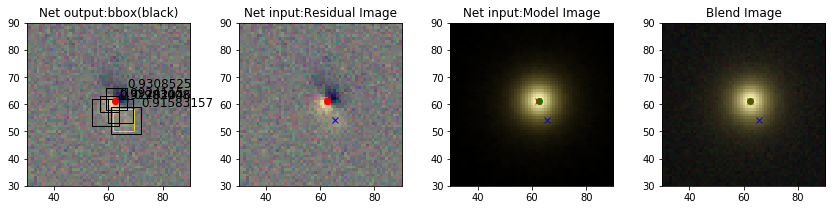

Number of predictions 2


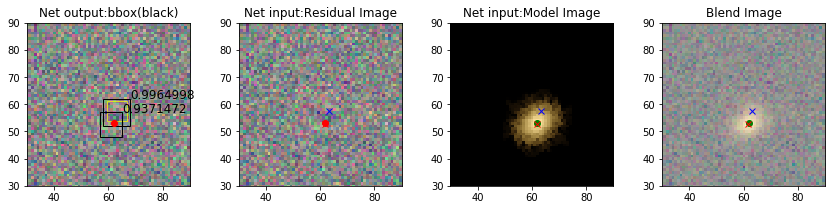

Number of predictions 2


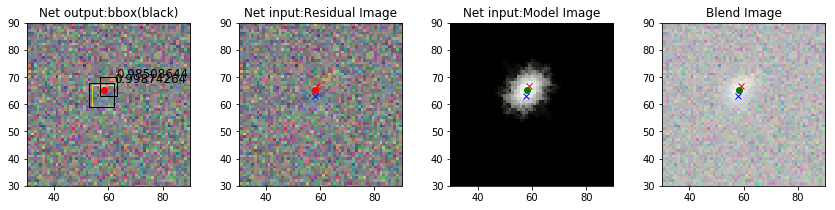

Number of predictions 2


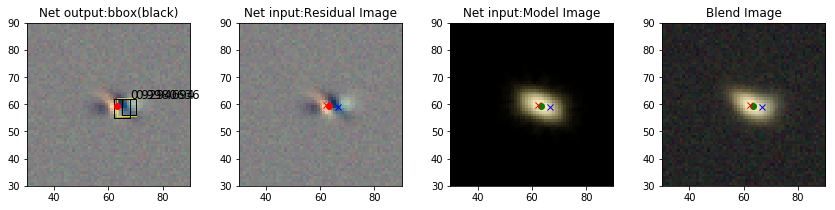

In [12]:
image_ids = np.random.choice(results['iter_shred']['id'], 10,replace=False)
for image_id in image_ids:
    q, = np.where(results['iter_shred']['id'] == image_id)
    print("Number of predictions", len(q))
    plot_utils.plot_results_images(results['iter_shred'], full_blend, X, Y, image_id)